In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [41]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [42]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [43]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.71735716 0.709514   0.7212787 ]
  [0.7408113  0.73296815 0.74473286]
  [0.7488921  0.741049   0.7528137 ]
  ...
  [0.7194415  0.69591206 0.7037552 ]
  [0.71868926 0.69515985 0.703003  ]
  [0.717937   0.6944076  0.7022507 ]]

 [[0.71660495 0.7087618  0.7205265 ]
  [0.7399086  0.73206544 0.74383014]
  [0.74859124 0.7407481  0.7525128 ]
  ...
  [0.7176471  0.69411767 0.7019608 ]
  [0.7176471  0.69411767 0.7019608 ]
  [0.7176471  0.69411767 0.7019608 ]]

 [[0.71585274 0.7080096  0.7197743 ]
  [0.7390059  0.7311628  0.7429275 ]
  [0.74829036 0.7404472  0.7522119 ]
  ...
  [0.7354317  0.71190226 0.7197454 ]
  [0.7361839  0.7126545  0.7204976 ]
  [0.73693615 0.71340674 0.7212499 ]]

 ...

 [[0.4639566  0.43650562 0.46787816]
  [0.46681502 0.43936405 0.4707366 ]
  [0.46967348 0.4422225  0.47359505]
  ...
  [0.56178874 0.52257305 0.5264946 ]
  [0.5387598  0.49954414 0.5034657 ]
  [0.59431016 0.5550945  0.55901605]]

 [[0.53713316 0.5096822  0.5410547 ]
  [0.5368323  0.5093813  0.54075384]


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [16]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
1506/32

47.0625

In [21]:
215/32

6.71875

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)


Epoch 1/20
47/47 [==============================] - 84s 2s/step - loss: 0.9412 - accuracy: 0.4950 - val_loss: 0.8779 - val_accuracy: 0.4792
Epoch 2/20
47/47 [==============================] - 80s 2s/step - loss: 0.8241 - accuracy: 0.5738 - val_loss: 0.8258 - val_accuracy: 0.5938
Epoch 3/20
47/47 [==============================] - 76s 2s/step - loss: 0.5998 - accuracy: 0.7255 - val_loss: 0.5293 - val_accuracy: 0.7969
Epoch 4/20
47/47 [==============================] - 77s 2s/step - loss: 0.3531 - accuracy: 0.8591 - val_loss: 0.3212 - val_accuracy: 0.8646
Epoch 5/20
47/47 [==============================] - 78s 2s/step - loss: 0.2613 - accuracy: 0.8858 - val_loss: 0.3054 - val_accuracy: 0.9010
Epoch 6/20
47/47 [==============================] - 78s 2s/step - loss: 0.2349 - accuracy: 0.9038 - val_loss: 0.3226 - val_accuracy: 0.8958
Epoch 7/20
47/47 [==============================] - 78s 2s/step - loss: 0.1715 - accuracy: 0.9352 - val_loss: 0.1723 - val_accuracy: 0.9427
Epoch 8/20
47/47 [==

In [23]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 5s 698ms/step - loss: 0.1071 - accuracy: 0.9676


In [24]:
scores


[0.10710860788822174, 0.9675925970077515]

In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
type(history.history['loss'])

list

In [29]:
len(history.history['loss'])

20

In [30]:
history.history['loss'][:5]

[0.9411562085151672,
 0.8241180181503296,
 0.599842369556427,
 0.35312527418136597,
 0.2613382041454315]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [32]:
val_acc

[0.4791666567325592,
 0.59375,
 0.796875,
 0.8645833134651184,
 0.9010416865348816,
 0.8958333134651184,
 0.9427083134651184,
 0.9010416865348816,
 0.875,
 0.9375,
 0.9427083134651184,
 0.921875,
 0.9427083134651184,
 0.9479166865348816,
 0.9375,
 0.9427083134651184,
 0.9427083134651184,
 0.9479166865348816,
 0.96875,
 0.953125]

In [33]:
acc


[0.4949899911880493,
 0.5738142728805542,
 0.725450873374939,
 0.8590514659881592,
 0.8857715725898743,
 0.9038076400756836,
 0.9352037310600281,
 0.9198396801948547,
 0.9434840679168701,
 0.9532397985458374,
 0.9605878591537476,
 0.9539077877998352,
 0.967420220375061,
 0.9559118151664734,
 0.9665998816490173,
 0.9679358601570129,
 0.9746158719062805,
 0.9527925252914429,
 0.9739478826522827,
 0.9786239266395569]

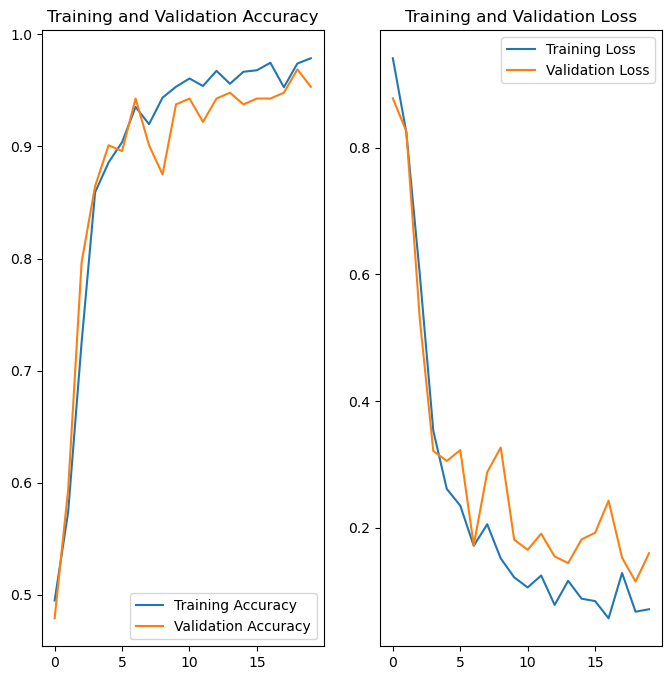

In [34]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict


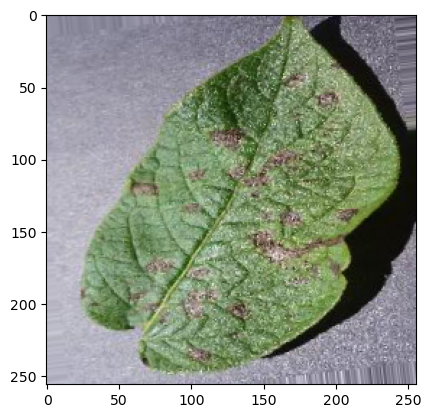

actual label: Potato___Early_blight
1/1 [==============================] - 0s 285ms/step
predicted label: Potato___Early_blight


In [44]:
import numpy as np
import matplotlib.pyplot as plt


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # Corrected variable name
    
    print("first image to predict")
    plt.imshow(first_image)
    plt.show()  # You need to show the image using plt.show()
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)  # Corrected variable name
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break


In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


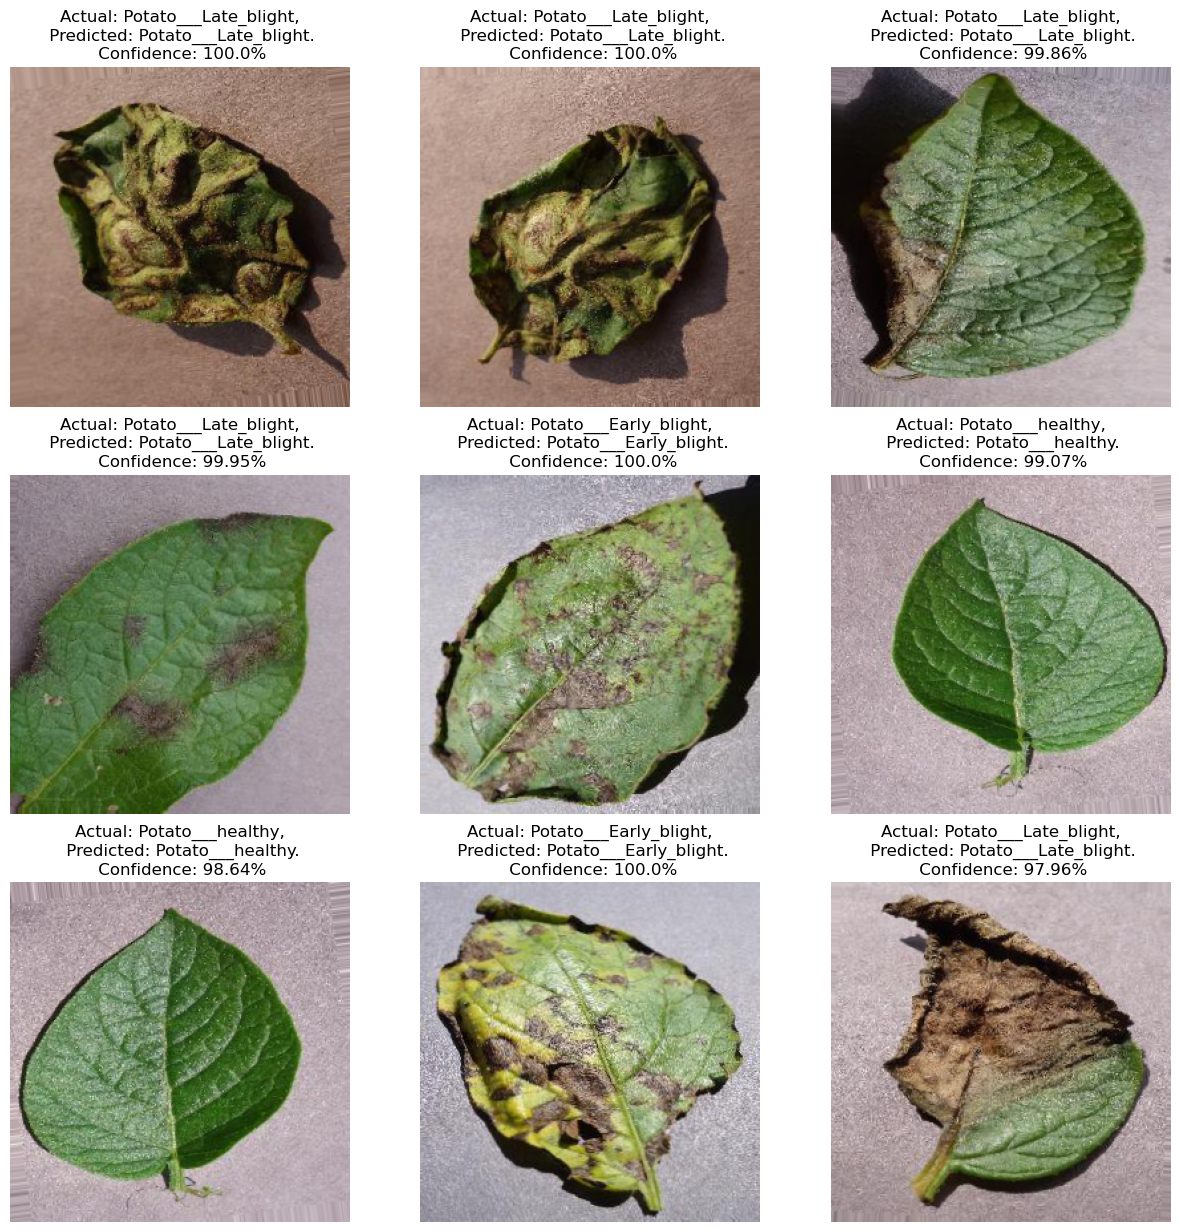

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [46]:
model.save("../potatoes.h5")

C:\Users\thila\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
model.save("../potatoes", save_format='tf')  # This will create a directory "potatoes" with model assets and variables


INFO:tensorflow:Assets written to: ../potatoes\assets


INFO:tensorflow:Assets written to: ../potatoes\assets
